## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [66]:
import numpy as np

In [67]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

### Load and normalize our data

In [68]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


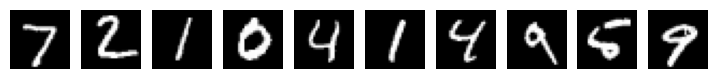

In [69]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Load our new symbol and test the autoencoder on this new symbol

1/1 [==============================] - 0s 18ms/step
(1, 784)


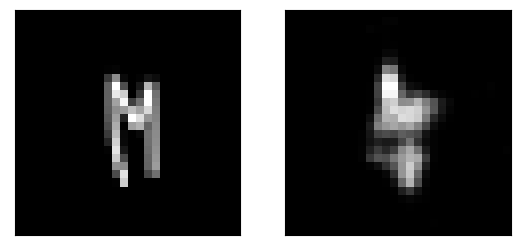

In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('./data/m3.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Continue training the pretrained autoencoder with only the new symbol

In [71]:
input_arr = input_arr.reshape(784)

new_images = [input_arr for _ in range(1000)]

new_images = np.array(new_images)
new_images.shape

(1000, 784)

In [72]:
from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = pretrained_model.fit(
    x=new_images, # For autoencoders, both the input and the target are the same
    y=new_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images, new_images),
    callbacks=[early_stop]
)

Epoch 1/10
8/8 [==============================] - 1s 32ms/step - loss: 0.0707 - val_loss: 0.0555
Epoch 2/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0527 - val_loss: 0.0506
Epoch 3/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0499 - val_loss: 0.0492
Epoch 4/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0491 - val_loss: 0.0489
Epoch 5/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0487 - val_loss: 0.0486
Epoch 6/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0486 - val_loss: 0.0485
Epoch 7/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0485 - val_loss: 0.0485
Epoch 8/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0485 - val_loss: 0.0484
Epoch 9/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0484 - val_loss: 0.0484
Epoch 10/10
8/8 [==============================] - 0s 19ms/step - loss: 0.0484 - val_loss: 0.0484


### Explore the performance of the autoencoder on the new symbol

1/1 [==============================] - 0s 60ms/step
(1, 784)


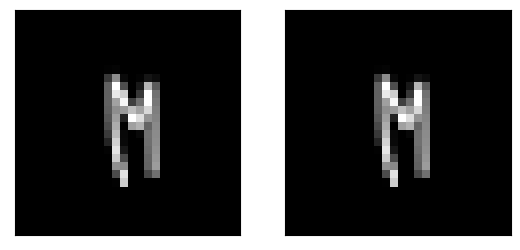

In [73]:
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('./data/m3.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can see, the updated autoencoder does a much better job with the new symbol!

### Test how our model does on the original 10 digits

Load the original 10 digits dataset and test the autoencoder on them.

In [74]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


313/313 [==============================] - 1s 4ms/step


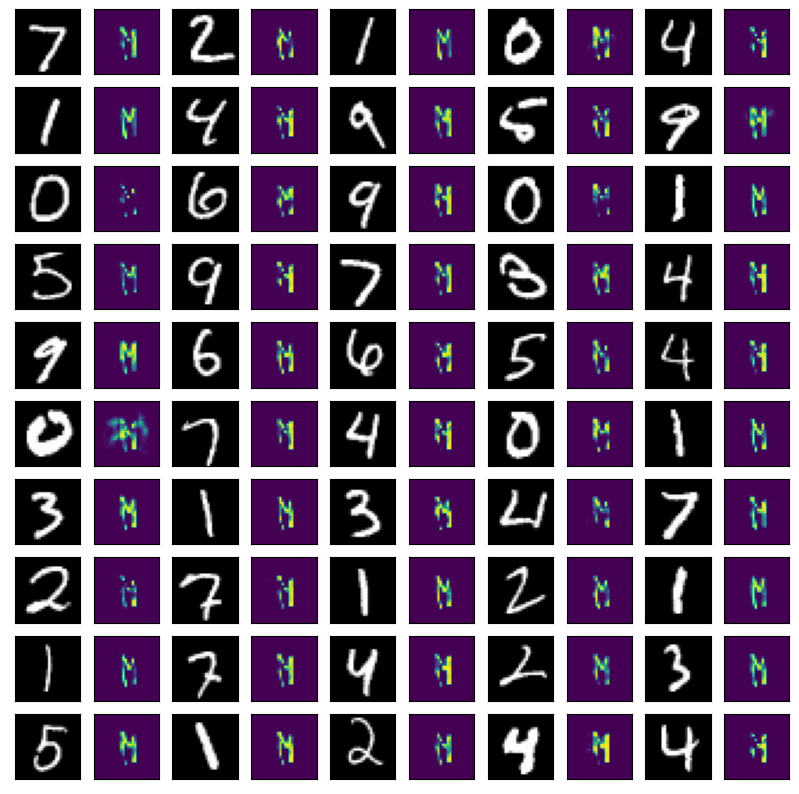

In [75]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()